In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('labels.csv')
df

,id,gender,age_group,race,body_shape
0,00001_00,woman,twenties,white,average
1,06679_00,woman,twenties,white,average
2,00006_00,woman,twenties,white,slim
3,06749_00,woman,twenties,white,slim
4,07212_00,woman,twenties,white,slim
...,...,...,...,...,...
13681,12193_00,woman,twenties,white,slim
13682,12690_00,woman,thirties,white,maternity
13683,14152_00,woman,twenties,white,slim
13684,14243_00,woman,thirties,white,full-figured


In [3]:
sns.set(style="whitegrid")
columns = ['gender', 'age_group', 'race', 'body_shape']


In [4]:
df = pd.read_csv('./preprocessed_2.csv')
df

,id,gender,age_group,race,body_shape
0,00001_00,woman,twenties,white,average
1,06679_00,woman,twenties,white,average
2,00006_00,woman,twenties,white,slim
3,06749_00,woman,twenties,white,slim
4,07212_00,woman,twenties,white,slim
...,...,...,...,...,...
13503,09866_00,woman,thirties,white,full-figured
13504,10118_00,woman,twenties,white,slim
13505,12690_00,woman,thirties,white,maternity
13506,14152_00,woman,twenties,white,slim


In [5]:
sns.set(style="whitegrid")
columns = ['gender', 'age_group', 'race', 'body_shape']


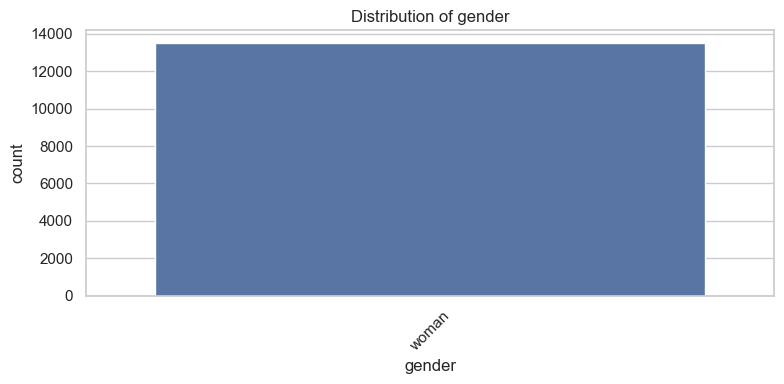

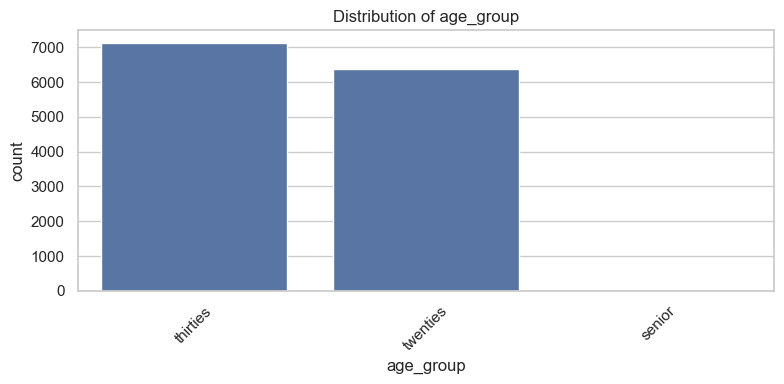

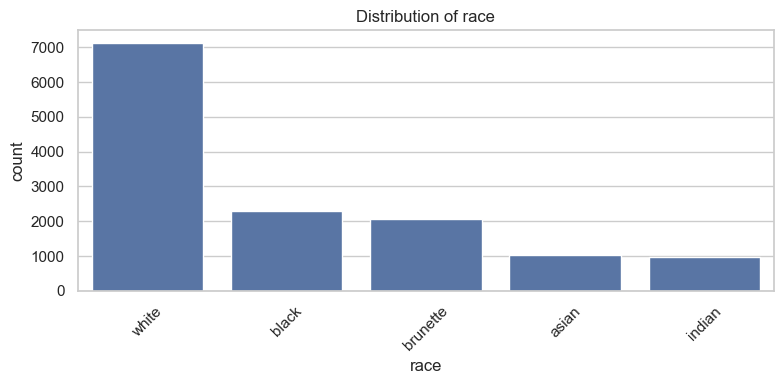

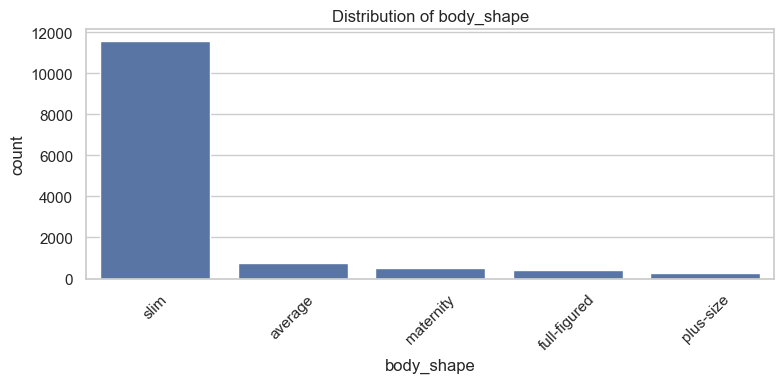

In [6]:
for col in columns:
    plt.figure(figsize=(8,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

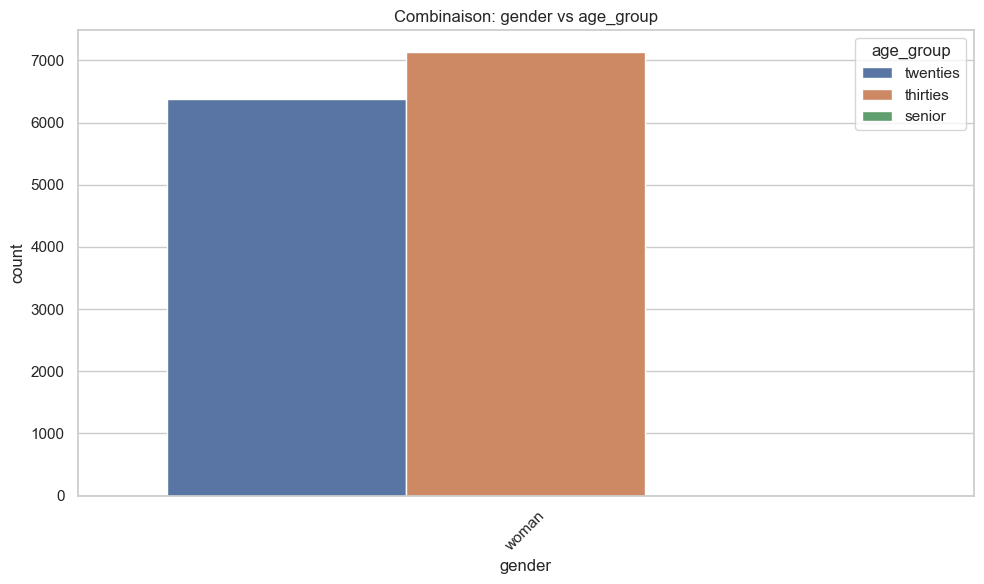

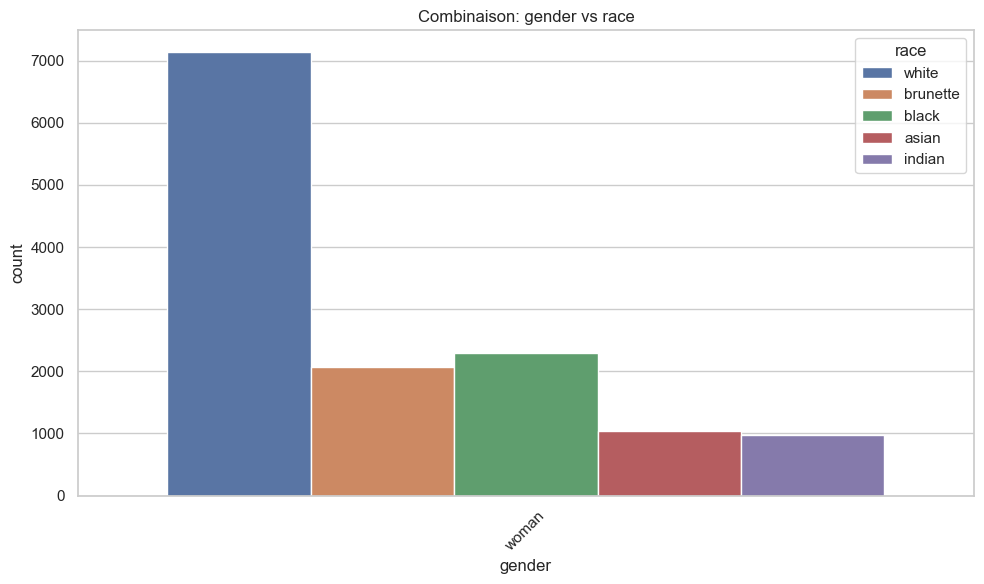

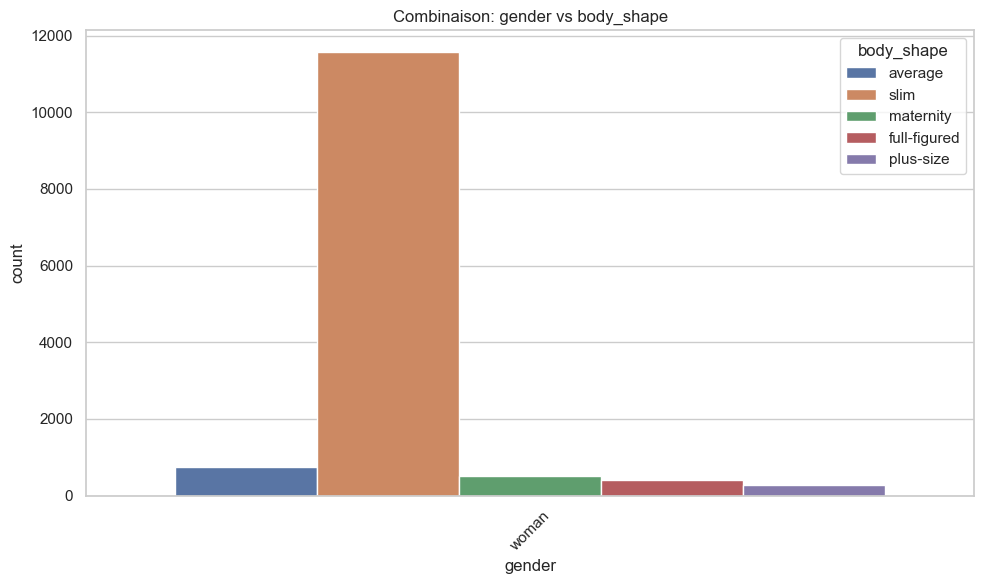

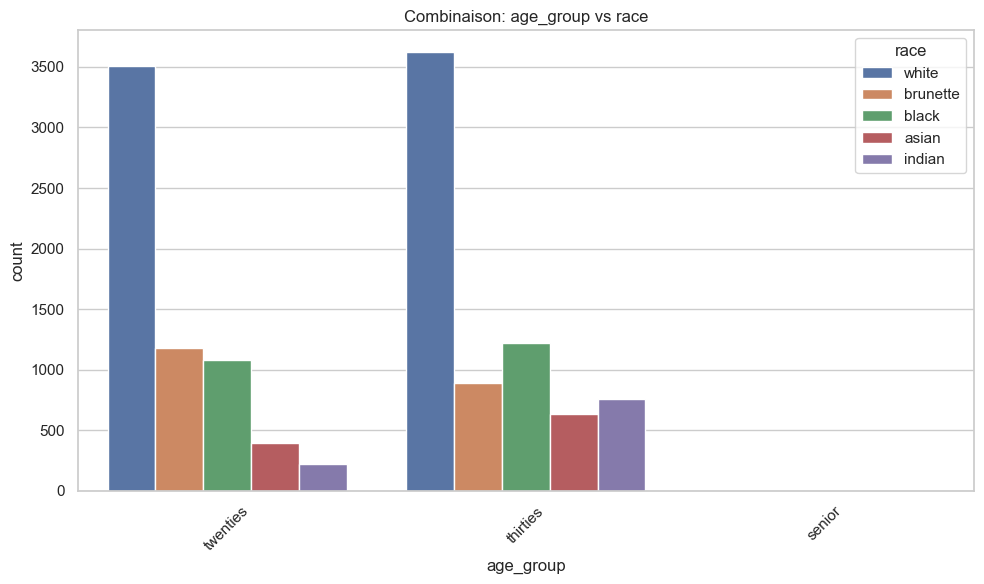

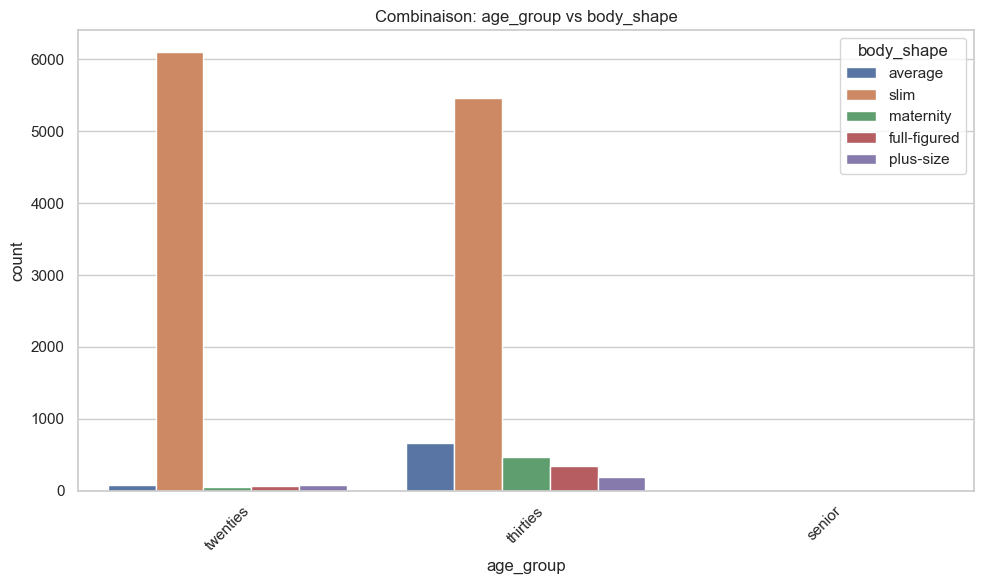

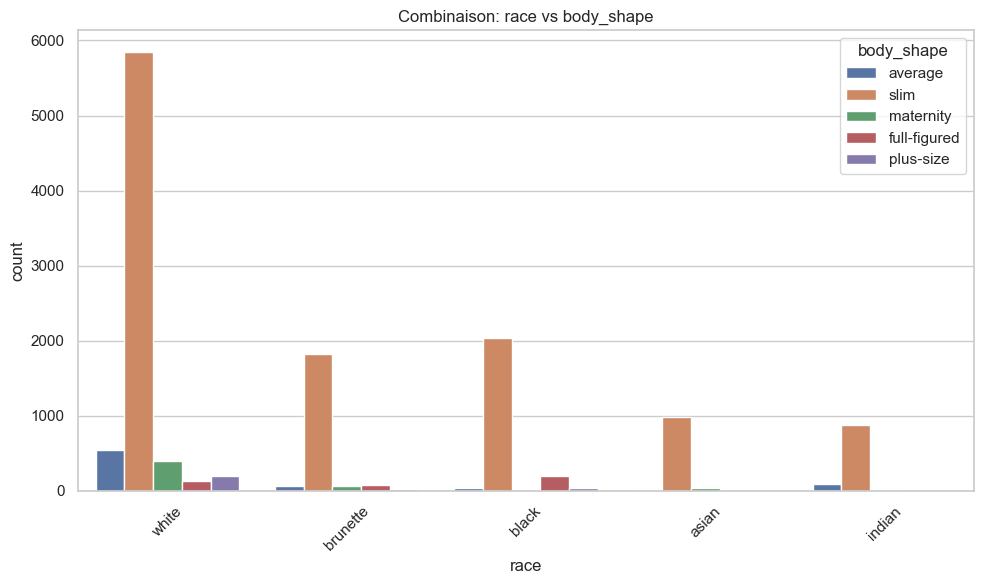

In [7]:
from itertools import combinations

combos = list(combinations(columns, 2))

for col1, col2 in combos:
    plt.figure(figsize=(10,6))
    sns.countplot(data=df, x=col1, hue=col2)
    plt.title(f'Combinaison: {col1} vs {col2}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


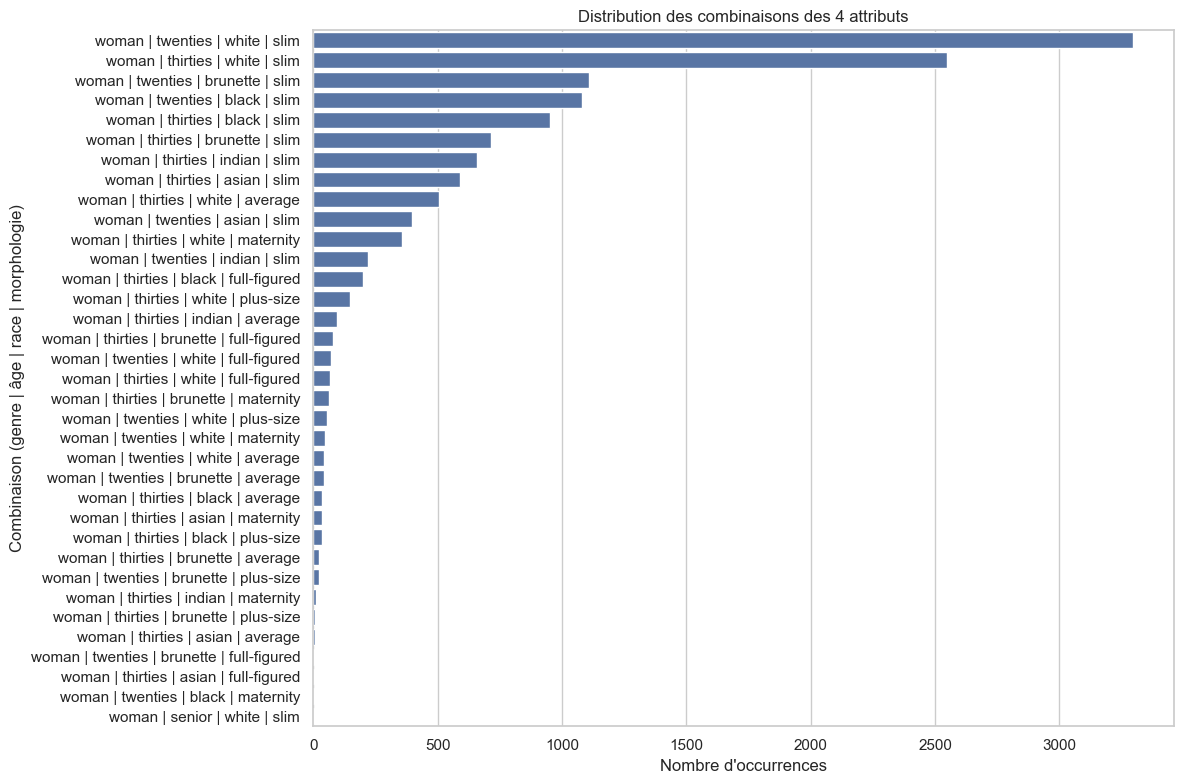

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['combo'] = df['gender'] + ' | ' + df['age_group'] + ' | ' + df['race'] + ' | ' + df['body_shape']

combo_counts = df['combo'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12,8))
sns.barplot(x=combo_counts.values, y=combo_counts.index)
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Combinaison (genre | âge | race | morphologie)")
plt.title("Distribution des combinaisons des 4 attributs")
plt.tight_layout()
plt.show()


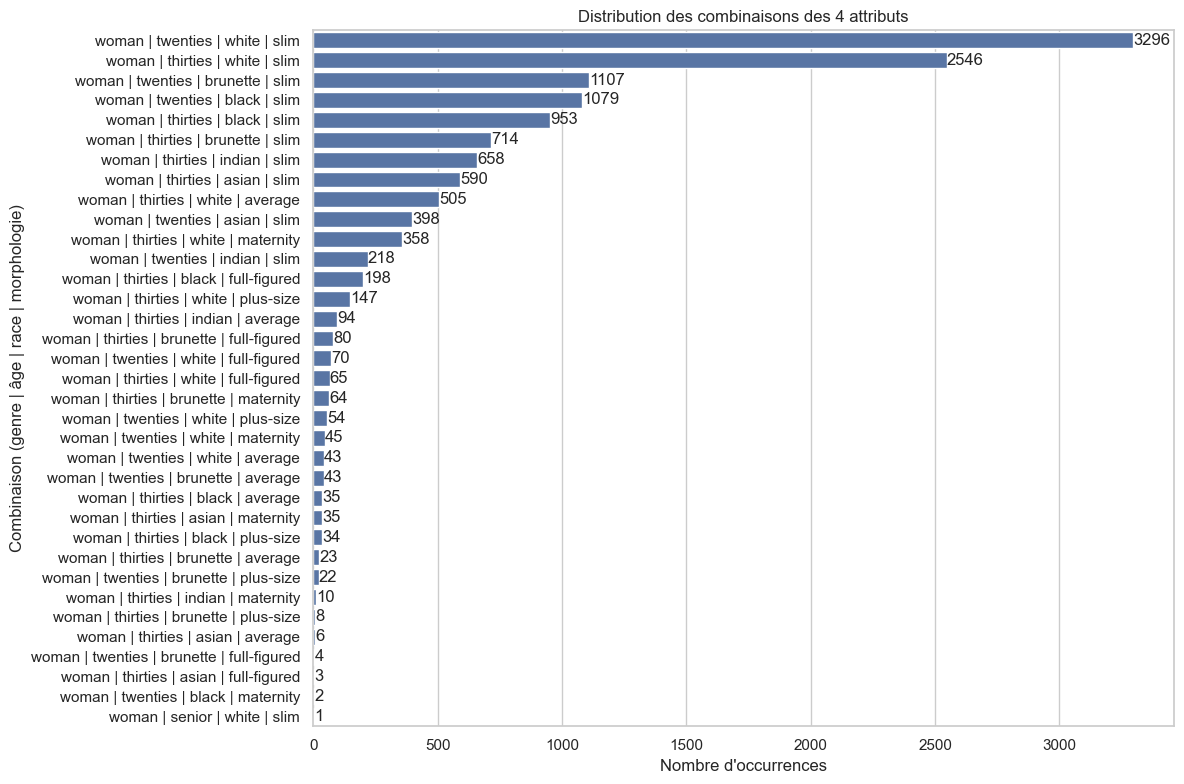

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Création de la colonne combo
df['combo'] = df['gender'] + ' | ' + df['age_group'] + ' | ' + df['race'] + ' | ' + df['body_shape']

# Comptage des occurrences
combo_counts = df['combo'].value_counts().sort_values(ascending=False)

# Création du graphique
plt.figure(figsize=(12, 8))
ax = sns.barplot(x=combo_counts.values, y=combo_counts.index)

# Ajout des annotations
for i, value in enumerate(combo_counts.values):
    ax.text(value + 0.5, i, str(value), va='center')

# Personnalisation
plt.xlabel("Nombre d'occurrences")
plt.ylabel("Combinaison (genre | âge | race | morphologie)")
plt.title("Distribution des combinaisons des 4 attributs")
plt.tight_layout()
plt.show()
